In [8]:
%matplotlib inline


In [2]:
# see: https://www.daniweb.com/programming/software-development/code/216976/play-a-midi-music-file-using-pygame

# sudo pip install pygame

# on ubuntu
# sudo apt-get install python-pygame

import pygame

def play_music(music_file):
    """
    stream music with mixer.music module in blocking manner
    this will stream the sound from disk while playing
    """
    clock = pygame.time.Clock()
    try:
        pygame.mixer.music.load(music_file)
        print("Music file %s loaded!" % music_file)
    except pygame.error:
        print("File %s not found! (%s)" % (music_file, pygame.get_error()))
        return
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        # check if playback has finished
        clock.tick(30)
# pick a midi music file you have ...
# (if not in working folder use full path)

midi_file = '/home/ds/dev/ext/dsnotebooks/muz/data/Guns_n_Roses_-_November_Rain.mid'
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)

# optional volume 0 to 1.0
pygame.mixer.music.set_volume(0.8)
try:
    play_music(midi_file)
except KeyboardInterrupt:
    # if user hits Ctrl/C then exit
    # (works only in console mode)
    pygame.mixer.music.fadeout(1000)
    pygame.mixer.music.stop()
    raise SystemExit

error: No available audio device

In [18]:
import numpy as np
import librosa as lr
from librosa import display
from mido import MidiFile



def to_piano_roll(midi):
    """Convert MIDI file to a 2D NumPy ndarray (notes, timesteps)."""
    notes = 127
    tempo = 500000  # Assume same default tempo and 4/4 for all MIDI files.
    seconds_per_beat = tempo / 1000000.0
    seconds_per_tick = seconds_per_beat / midi.ticks_per_beat
    velocities = np.zeros(notes)
    sequence = []
    for m in midi:
        ticks = int(np.round(m.time / seconds_per_tick))
        ls = [velocities.copy()] * ticks
        sequence.extend(ls)
        if m.type == 'note_on':
            velocities[m.note] = m.velocity
        elif m.type == 'note_off':
            velocities[m.note] = 0
        else:
            continue
    piano_roll = np.array(sequence).T
    return piano_roll



In [17]:
piano_roll.shape

(127, 57854)

In [23]:
f1 = MidiFile(midi_file)
piano_roll = to_piano_roll(f1)
piano_roll.shape

(127, 57854)

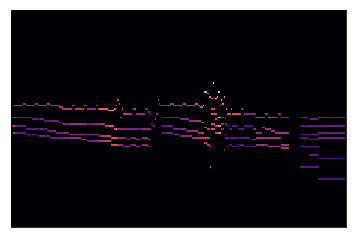

In [21]:
display.specshow(piano_roll);

In [25]:
f1.print_tracks()

=== Track 0
<meta message time_signature numerator=1 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='G' time=0>
<meta message set_tempo tempo=1071427 time=0>
<meta message track_name name='Prelude No. 4' time=0>
<meta message text text='Frederic Chopin' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=256>
<meta message set_tempo tempo=1052631 time=128>
<meta message set_tempo tempo=1034482 time=384>
<meta message set_tempo tempo=1052631 time=256>
<meta message set_tempo tempo=1071427 time=256>
<meta message set_tempo tempo=1034482 time=183>
<meta message set_tempo tempo=1016949 time=329>
<meta message set_tempo tempo=1034482 time=256>
<meta message set_tempo tempo=1052631 time=256>
<meta message set_tempo tempo=1016949 time=256>
<meta message set_tempo tempo=1000000 time=256>
<meta message set_tempo tempo=1016949 time=256>
<meta message set_tempo tempo=1034482 